# Necessary library imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kurtosis, skew

# Reading in all the files

In [2]:
df2 = pd.read_csv('..//output//2v.csv')
df3 = pd.read_csv('..//output//3v.csv')
df4 = pd.read_csv('..//output//4v.csv')
df5 = pd.read_csv('..//output//5v.csv')
df6 = pd.read_csv('..//output//6v.csv')
df7 = pd.read_csv('..//output//7v.csv')
df8 = pd.read_csv('..//output//8v.csv')
df9 = pd.read_csv('..//output//9v.csv')
df10 = pd.read_csv('..//output//10v.csv')

# Assigning df to the file on which the analysis is to be done and n to the number of vertices the file is for (avoids redundant loading of files).

In [72]:
df, n = df8, 8

# Viewing the data

In [73]:
df.head()

,Graph_number,Number_of_vertices,starting_colour_vector,ending_colour_vector,step_time,cycle
0,1,8,"[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",1,1
1,1,8,"[1, 1, 1, 1, 1, 1, 1, -1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1
2,1,8,"[1, 1, 1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1
3,1,8,"[1, 1, 1, 1, 1, 1, -1, -1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1
4,1,8,"[1, 1, 1, 1, 1, -1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1


# Obtaining the value counts for variables 'step_time', 'cycle', starting_colour_vector' and 'ending_colour_vector'

In [74]:
step_time_value_counts = df['step_time'].value_counts()
print(step_time_value_counts)

2    2826273
3    2059077
4     897151
5     253919
1     222079
6      37814
7       4231
8        384
Name: step_time, dtype: int64


In [75]:
cycle_value_counts = df['cycle'].value_counts()
print(cycle_value_counts)

1    6031294
2     269634
Name: cycle, dtype: int64


In [76]:
scv_value_counts = df['starting_colour_vector'].value_counts()
print(scv_value_counts)

[1, 1, 1, 1, 1, 1, 1, 1]           49226
[1, 1, 1, 1, 1, 1, 1, -1]          49226
[1, -1, 1, -1, -1, -1, -1, 1]      49226
[1, -1, 1, -1, -1, -1, 1, -1]      49226
[1, -1, 1, -1, -1, -1, 1, 1]       49226
                                   ...  
[1, 1, -1, 1, 1, -1, 1, -1]        49226
[1, 1, -1, 1, 1, -1, 1, 1]         49226
[1, 1, -1, 1, 1, 1, -1, -1]        49226
[1, 1, -1, 1, 1, 1, -1, 1]         49226
[1, -1, -1, -1, -1, -1, -1, -1]    49226
Name: starting_colour_vector, Length: 128, dtype: int64


In [77]:
ecv_value_counts = df['ending_colour_vector'].value_counts()
print(ecv_value_counts)

[1, 1, 1, 1, 1, 1, 1, 1]            4022743
[-1, -1, -1, -1, -1, -1, -1, -1]    1995119
[1, 1, 1, -1, -1, -1, -1, 1]          10450
[1, 1, -1, 1, -1, -1, -1, 1]          10395
[1, 1, -1, 1, -1, -1, 1, -1]          10302
                                     ...   
[-1, -1, 1, 1, -1, -1, -1, 1]             1
[-1, -1, 1, -1, 1, -1, 1, -1]             1
[-1, -1, 1, -1, 1, -1, -1, 1]             1
[-1, -1, 1, 1, -1, -1, 1, -1]             1
[-1, -1, -1, 1, 1, -1, 1, -1]             1
Name: ending_colour_vector, Length: 154, dtype: int64


# Converting the value counts for all the variables to percent form

In [78]:
step_time_value_counts_percent = dict(df.step_time.value_counts(normalize=True) * 100)
for k, v in step_time_value_counts_percent.items():
    step_time_value_counts_percent[k] = round(v, 1)

print(step_time_value_counts_percent)

{2: 44.9, 3: 32.7, 4: 14.2, 5: 4.0, 1: 3.5, 6: 0.6, 7: 0.1, 8: 0.0}


In [79]:
cycle_value_counts_percent = dict(df.cycle.value_counts(normalize=True) * 100)
for k, v in cycle_value_counts_percent.items():
    cycle_value_counts_percent[k] = round(v, 1)

print(cycle_value_counts_percent)

{1: 95.7, 2: 4.3}


In [80]:
scv_value_counts_percent = dict(df.starting_colour_vector.value_counts(normalize=True) * 100)
for k, v in step_time_value_counts_percent.items():
    step_time_value_counts_percent[k] = round(v, 1)

print(step_time_value_counts_percent)

{2: 44.9, 3: 32.7, 4: 14.2, 5: 4.0, 1: 3.5, 6: 0.6, 7: 0.1, 8: 0.0}


In [81]:
ecv_value_counts_percent = dict(df.ending_colour_vector.value_counts(normalize=True) * 100)
for k, v in ecv_value_counts_percent.items():
    ecv_value_counts_percent[k] = round(v, 1)

print(ecv_value_counts_percent)

{'[1, 1, 1, 1, 1, 1, 1, 1]': 63.8, '[-1, -1, -1, -1, -1, -1, -1, -1]': 31.7, '[1, 1, 1, -1, -1, -1, -1, 1]': 0.2, '[1, 1, -1, 1, -1, -1, -1, 1]': 0.2, '[1, 1, -1, 1, -1, -1, 1, -1]': 0.2, '[1, 1, 1, -1, -1, -1, 1, -1]': 0.2, '[1, 1, -1, -1, 1, -1, -1, 1]': 0.1, '[1, 1, -1, -1, 1, -1, 1, -1]': 0.1, '[1, -1, 1, -1, 1, -1, -1, 1]': 0.1, '[1, -1, 1, 1, -1, -1, -1, 1]': 0.1, '[1, -1, -1, 1, 1, -1, -1, 1]': 0.1, '[1, -1, -1, 1, 1, -1, 1, -1]': 0.1, '[1, -1, 1, 1, -1, -1, 1, -1]': 0.1, '[1, -1, 1, -1, 1, -1, 1, -1]': 0.1, '[1, -1, -1, 1, -1, 1, 1, -1]': 0.1, '[1, -1, -1, -1, 1, 1, 1, -1]': 0.1, '[1, -1, 1, -1, -1, 1, 1, -1]': 0.1, '[1, -1, 1, -1, -1, 1, -1, 1]': 0.1, '[1, -1, -1, -1, 1, 1, -1, 1]': 0.1, '[1, -1, -1, 1, -1, 1, -1, 1]': 0.1, '[1, 1, 1, 1, 1, 1, -1, -1]': 0.1, '[1, 1, -1, -1, -1, -1, 1, 1]': 0.1, '[1, 1, -1, -1, -1, 1, 1, -1]': 0.1, '[1, 1, -1, -1, -1, 1, -1, 1]': 0.1, '[-1, -1, -1, 1, 1, 1, 1, -1]': 0.1, '[-1, -1, 1, -1, 1, 1, -1, 1]': 0.1, '[-1, -1, 1, -1, 1, 1, 1, -1]': 0.1, 

# Saving the percent form as a new column for further visualisation

In [82]:
df['percent_sp'] = df['step_time'].map(step_time_value_counts_percent)
df.head()

,Graph_number,Number_of_vertices,starting_colour_vector,ending_colour_vector,step_time,cycle,percent_sp
0,1,8,"[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",1,1,3.5
1,1,8,"[1, 1, 1, 1, 1, 1, 1, -1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9
2,1,8,"[1, 1, 1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9
3,1,8,"[1, 1, 1, 1, 1, 1, -1, -1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9
4,1,8,"[1, 1, 1, 1, 1, -1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9


In [83]:
df['percent_cy'] = df['cycle'].map(cycle_value_counts_percent)
df.head()

,Graph_number,Number_of_vertices,starting_colour_vector,ending_colour_vector,step_time,cycle,percent_sp,percent_cy
0,1,8,"[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",1,1,3.5,95.7
1,1,8,"[1, 1, 1, 1, 1, 1, 1, -1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9,95.7
2,1,8,"[1, 1, 1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9,95.7
3,1,8,"[1, 1, 1, 1, 1, 1, -1, -1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9,95.7
4,1,8,"[1, 1, 1, 1, 1, -1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9,95.7


In [84]:
df['percent_scv'] = df['starting_colour_vector'].map(scv_value_counts_percent)
df.head()

,Graph_number,Number_of_vertices,starting_colour_vector,ending_colour_vector,step_time,cycle,percent_sp,percent_cy,percent_scv
0,1,8,"[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",1,1,3.5,95.7,0.78125
1,1,8,"[1, 1, 1, 1, 1, 1, 1, -1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9,95.7,0.78125
2,1,8,"[1, 1, 1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9,95.7,0.78125
3,1,8,"[1, 1, 1, 1, 1, 1, -1, -1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9,95.7,0.78125
4,1,8,"[1, 1, 1, 1, 1, -1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9,95.7,0.78125


In [85]:
df['percent_ecv'] = df['ending_colour_vector'].map(ecv_value_counts_percent)
df.head()

,Graph_number,Number_of_vertices,starting_colour_vector,ending_colour_vector,step_time,cycle,percent_sp,percent_cy,percent_scv,percent_ecv
0,1,8,"[1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",1,1,3.5,95.7,0.78125,63.8
1,1,8,"[1, 1, 1, 1, 1, 1, 1, -1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9,95.7,0.78125,63.8
2,1,8,"[1, 1, 1, 1, 1, 1, -1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9,95.7,0.78125,63.8
3,1,8,"[1, 1, 1, 1, 1, 1, -1, -1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9,95.7,0.78125,63.8
4,1,8,"[1, 1, 1, 1, 1, -1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1]",2,1,44.9,95.7,0.78125,63.8


# Setting plotting style

In [86]:
sns.set_style("dark")
sns.despine()

<Figure size 432x288 with 0 Axes>

# Bar plot for variable step_time

Text(0, 0.5, 'percentage')

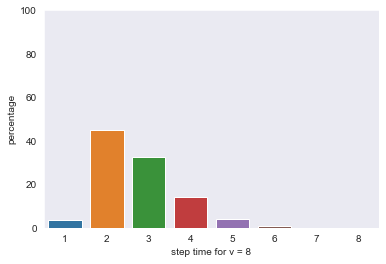

In [87]:
bar = sns.barplot(x=df['step_time'], y=df['percent_sp'], data=df)
bar.set(ylim=(0, 100))
bar.set_xlabel('step time for v = {}'.format(n))
bar.set_ylabel('percentage')

# Bar plot for variable cycle

Text(0, 0.5, 'percentage')

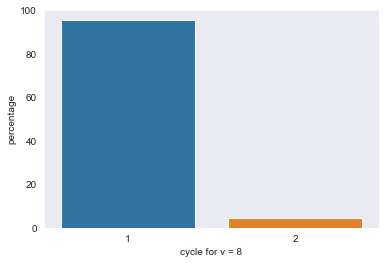

In [88]:
bar = sns.barplot(x=df['cycle'], y=df['percent_cy'], data=df)
bar.set(ylim=(0, 100))
bar.set_xlabel('cycle for v = {}'.format(n))
bar.set_ylabel('percentage')

# Bar plot for variable starting colour vector

Text(0, 0.5, 'percentage')

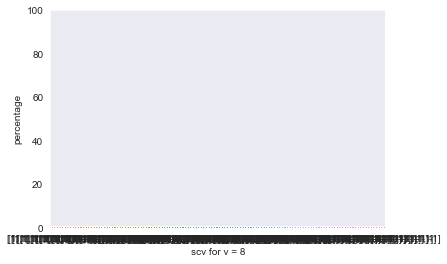

In [89]:
bar = sns.barplot(x=df['starting_colour_vector'], y=df['percent_scv'], data=df)
bar.set(ylim=(0, 100))
bar.set_xlabel('scv for v = {}'.format(n))
bar.set_ylabel('percentage')

# Bar plot for variable ending colour vector

Text(0, 0.5, 'percentage')

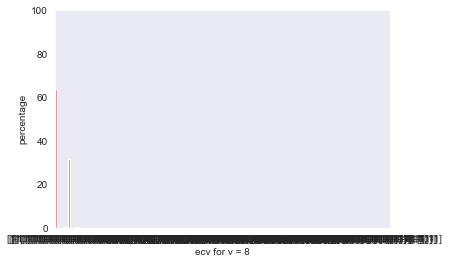

In [90]:
bar = sns.barplot(x=df['ending_colour_vector'], y=df['percent_ecv'], data=df)
bar.set(ylim=(0, 100))
bar.set_xlabel('ecv for v = {}'.format(n))
bar.set_ylabel('percentage')

# Variance, Mean, Skew and Kurtosis analysis for the following columns

## Step_time

C:\Users\sansk\anaconda3\envs\dataSci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean :  33.13592597807722
var  :  185.51078140599677
skew :  -0.9434349137931636
kurt :  -0.36375053086350917


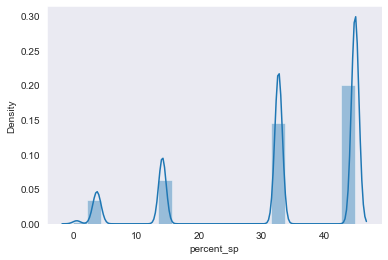

In [91]:
var = np.var(df['percent_sp'])
mean = df['percent_sp'].mean()
sns.distplot(df['percent_sp'], bins=20)


print("mean : ", mean)
print("var  : ", var)
print("skew : ",skew(df['percent_sp']))
print("kurt : ",kurtosis(df['percent_sp']))

## Cycle

C:\Users\sansk\anaconda3\envs\dataSci\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyboardInterrupt: 

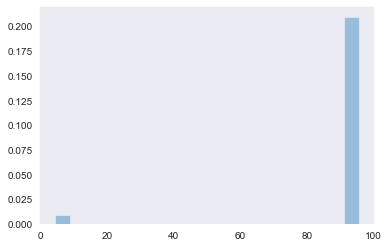

In [92]:
var = np.var(df['percent_cy'])
mean = df['percent_cy'].mean()
sns.distplot(df['percent_cy'], bins=20)


print("mean : ", mean)
print("var  : ", var)
print("skew : ",skew(df['percent_cy']))
print("kurt : ",kurtosis(df['percent_cy']))

## Starting colour vector

In [ ]:
var = np.var(df['percent_scv'])
mean = df['percent_scv'].mean()
sns.distplot(df['percent_scv'], bins=20)


print("mean : ", mean)
print("var  : ", var)
print("skew : ",skew(df['percent_scv']))
print("kurt : ",kurtosis(df['percent_scv']))

## Ending colour vector

In [ ]:
var = np.var(df['percent_ecv'])
mean = df['percent_ecv'].mean()
sns.distplot(df['percent_ecv'], bins=20)


print("mean : ", mean)
print("var  : ", var)
print("skew : ",skew(df['percent_ecv']))
print("kurt : ",kurtosis(df['percent_ecv']))